<a href="https://colab.research.google.com/github/KNDickens/JavaIIFinalProject/blob/master/BTC_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Before you start**

Make sure you download a copy of this starter file and save a copy that you can access. 

Otherwise, if you close the tab, you may lose all your work. 

File > Save a Copy in Drive > Save a Copy with your name 
Example "BTC_LabElisaCundiff.ipynb"

#Bitcoin Lab: Making a trading bot with libraries#

This lab looks long and scary but most of it is given to you. This lab is more of a fun lab to read through to show you the power of libraries combined with the skills you already have!</br>
</br>
For this lab, we will be using a library called Pandas which allows users to generate a table-like data structure called a DataFrame (commonly abbreviated as df).We will use the Pandas library to gain access to methods that allow us to import our data into a df so we can carry out powerful operations on the column/row values. We then will utilize a plotting and data visualization library called MatPlotlib to plot data. This library will allow us to take data from our rows and columns of data and visualize them graphically.

Matplotlib is a library that has quite confusing and non-intuitive code but since it is so widely used, a simple Google search leads to large blocks of code that can be used and edited to fit your needs.

### Part 1

The first cell is going to import a few libraries. This is one of the most powerful parts of python. 

You are able to pull from bundles of code to do amazing things really quickly. 

Below are the two very popular python libraries we will be utilizing: 
1. matplotlib
2. pandas


In [ ]:
''' These may seem scary but these are just the libraries that supply the graphing and csv editing functions'''
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter
import pandas as pd

## Part 2

Now we will read the BTC csv into a Pandas dataframe. We will set the index column equal to the Date column so that all of the price data is linked to the date. We then select the columns that we want to use from the csv (Date and Close). The close price is the price of BTC when the market closes at the end of the day.

We can then preview the dataframe we made with df.head() to see the first 5 rows.

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/CSU-CS150B/handouts/main/ExampleCode/BTCUSD_day.csv',index_col = 0, parse_dates = True, usecols = ['Date','Close'])  
print(df.head())  # Function that prints the first 5 rows of the dataframe      


## Part 3

### Relative Strength Index - RSI

#### What is the Relative Strength Index (RSI)?
Is a technical indicator commonly used by traders to assess whether a stock is overbought or oversold. The Relative Strength Index calculates the ratio of upward price movements to downward price movements over a given period of time and then plots that information on a scale from 0 to 100. 
A stock is generally considered overbought when the RSI indicator reaches 70 or above and oversold when it falls below 30. However, it’s important to note that RSI is just one tool traders can use to make decisions. It should not be exclusively relied on.

Nevertheless, the Relative Strength Index can be a helpful indicator for those looking to make informed trading decisions. Here is how we would interrupt RSI in stocks within the stock market today. 

Over a 14-day period RSI, the upper and bottom technical levels would be the following: 

If the RSI is equal or greater than 70, that means in theory that the stock is overbought. Also that the upward price trend is potentially set to reverse, which can result in losses in the event the trader does not sell.
If the RSI is equal or less than 30, this means the stock is oversold. This results in a potential downward price trend reversal to the upside, which can result in generating profit if the trader buys.

https://www.nasdaq.com/articles/what-is-the-relative-strength-index-rsi-in-stocks

In [ ]:
#rsi method
def rsi(df, periods):
    
    #change in cell values
    close_delta = df['Close'].diff();
    
    #removing any exponants
    up = close_delta.clip(lower=0);
    down = -1 * close_delta.clip(upper=0);
    
    #exponetial rolling averages used
    MA_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean();
    MA_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean();
        
    rsi = MA_up / MA_down;
    
    rsi = 100 - (100/(1 + rsi));
    
    return rsi

# Task 1:
Create a variable called rsi_data and set it equal to the RSI over a 14 day period using the dataframe we created in Part 2.

*Hint: Use the RSI function. This should be a single line of code.*

In [ ]:
# create a variable called rsi_data
# set that equal to a call to the rsi function 
# your arguments in your rsi function dhould be the df and the number of days we are searching
''' Your code here''' # just one line of code



## Part 3

### Moving Averages

A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the noise from random short-term price fluctuations. We can utilize the moving averages to identify safer times to buy and sell assets. 

For this lab, we will consider it a good time to buy when the 20 day moving average price passes above the 50 day moving average price and a good time to sell when the 20 day MA price drops below the 50 day MA price.

In [ ]:
MA_50 = df['Close'].rolling(window = 50).mean()  # Calculate the 50 day moving average
df['MA_50'] = MA_50  # Add the new column to the dataframe
MA_20 = df['Close'].rolling(window = 20).mean()  # Calculate the 20 day moving average
df['MA_20'] = MA_20  # Add the new column to the dataframe

print(df.head(51));  # Print the first 5 rows of the dataframe as a sanity check

# Do you notice Not a Number (NaN) values in MA_50 and MA_20?? Why might this be?

# Task 2:

Notice how the first 50 rows of the MA_50 column are NaN (not a number)? This is because the moving average is calculated using the previous 50 days of data. So the 50 day moving average doesn't exist until we hit the 50th data point. 

We can drop these rows from the dataframe. Find the Pandas method via Google that drops NA or NaN values from the dataframe and call it on your df.

*Hint: try to do this inplace (meaning that the function to drop NANs edits the dataframe inplace). The call to drop NaNs should be one line and be called on your df. Print the first 50 rows of your dataframe using df.head() to make sure your changes took place!*

Other note: I had a student once tell me that they realized that 95% of data science was data cleaning, and I said "yes!". It can also be lots of fun when you start seeing how many tools you can employ to clean up data for you. This is your first toe-dip!

In [ ]:
# Drop the NaN rows from the df and then view the first 50 rows of the df using the head() method.

''' Your code here'''



print(df.head(50))

If you got this to clean your data properly your first few printed lines should now be: 
  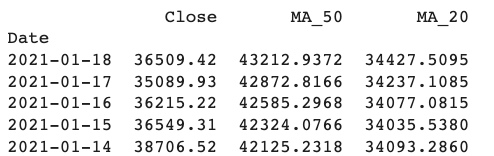

If you got there, yay!  

If you haven't gotten there yet.  Do some more googleing and playing with ideas to see where you can get. 

The point of this part of the activity is to start feeling comfortable looking things up and trying them out. The faster you get comfortable doing that, the faster you will become a speedy programming maven. 

So, spend at least 20 minutes trying to figure this out before asking for help. 

If you spend more than an hour on this and don't get anywhere, then reach out to a UTA and they'll get you on track. 

# Part 4
## Creating the Buy and Sell Lists

We now have the 50 and 20 day moving averages appended to our dataframe so we can now calculate the buy and sell triggers. 

**Buy Trigger:**

Occurs when the 20 day rolling/moving average price passes above the 50 day MA price. We can determine this by looping through our dataframe and seeing if the MA_20 is greater than the MA_50 AND yesterdays (currentIndex - 1) MA_20 price was less than yesterdays MA_50 price.

**Sell Trigger:**

Occurs when the 20 day rolling/moving average price dips below the 50 day MA price. We can determine this by looping through our dataframe and seeing if the MA_20 is less than the MA_50 AND yesterdays (currentIndex - 1) MA_20 price was greater than yesterdays MA_50 price.

Whenever these two things occur, we will then add that row of the dataframe to either the buy or sell list we have created.


# Task 3:

### Create two empty lists called buy_list and sell_list to store the buy and sell triggers.

In [ ]:
# A common trading strategy is to buy when the 20 day moving average crosses above the 50 day moving average
# and sell when the 20 day moving average crosses below the 50 day moving average

''' 
Create two empty lists called buy_list and sell_list to store the buy and sell triggers.
'''

'''
Your code goes here
'''



In order to access specific rows and columns of our dataframe using the Pandas library we use the method .iloc[] as seen below:

> df.MA_20.iloc[ i ]

This code will access the value of the MA_20 column in the i'th row of the dataframe df.

# Task 4:

Using the information provided above and the code given below, complete the elif statement to check if a sell flag has been triggered and if so, append it to sell_list.

What we are doing here is verifying if the row at index i in the dataframe df is a buy or a sell we are adding the index (i) to the buy_list or sell_list.

*Hint: This is very similar to the code in the if statement. It should be two lines of code but just follow different logic than the buy trigger.*

**Note:** You should run your code in the cell above everytime you want to re-test the code below. Re-running your code cell above will reset the buy and sell lists to being empty. Otherwise you will just keep adding to the lists everytime you run the cell below testing your code.

In [ ]:
''' 
The want the dates to be oldest to newest for trading though.
So let's sort the dataframe from oldest to newest.
'''
# sort the dataframe by date from oldest date to current date
df = df.sort_values(by = 'Date')



for i in range(len(df)):  # Loop through the dataframe. iloc is used to access the data at a specific index (row)
    if df.MA_20.iloc[i] > df.MA_50.iloc[i] and df.MA_20.iloc[i-1] < df.MA_50.iloc[i-1]:  # If the 20 day moving average is greater than the 50 day moving average and the 20 day moving average was less than the 50 day moving average on the previous day
        buy_list.append(i)  # Add the index of the buy signal to the Buy list
    # Answer to Task 4
    elif df.MA_20.iloc[i] < df.MA_50.iloc[i] and df.MA_20.iloc[i-1] > df.MA_50.iloc[i-1]:  
        sell_list.append(i)  # Add the index of the sell signal to the Sell list
    ''' 
    TODO complete the elif statement:
          create the logic to check if a sell flag has been triggered and add it to sell_list

    Student code here:
    elif 

    '''

# Tests to ensure you did your elif statment correctly
# Should print True if your code is correct
print(sell_list == [93, 137, 294, 442, 513, 618, 688, 833, 886, 971, 1027, 1062, 1142, 1188, 1369, 1441, 1505, 1608, 1705, 1783])

# Part 5

This is a little counter intuitive but here we can create new columns in our dataframe called Buy and Sell and then go through the index values in our buy_list and sell_list and fill the Close price for that index (Row) into the new Buy or Sell column.

So for each index in our buy and sell lists, the dataframe df should now have the price from the 'Close' column in that row in the associated 'Buy' or 'Sell' columns we just created.

Since there aren't many buy and sell triggers there are going to be a LOT of NaN values in the 'Buy' and 'Sell' columns but we don't need to drop these.

In [ ]:
# let us check what is in our buy and sell lists
print('Buy List:')
print(buy_list)

print('Sell List:')
print(sell_list)

# note that there will be NaN values in the Buy and Sell columns where there is no buy or sell signal
print('\n\n')
print(df.head(20))

# now we can add the buy and sell signals to the dataframe
df['Buy'] = df['Close'].iloc[buy_list]  # Add the buy signal to the dataframe
df['Sell'] = df['Close'].iloc[sell_list]  # Add the sell signal to the dataframe

print('\n\n')
print(df.head(20))

# Part 6: Plotting With Matplotlib

We are going to plot three graphs all on one plot. In order to do this we use the matplotlib function above. Recall that we imported matplotlib.pyplot as plt and ScalarFormatter from matplotlib.ticker:

  > * import matplotlib.pyplot as plt 
    * Used to draw the plots and create the figures </br>
  > * from matplotlib.ticker import ScalarFormatter 
    * Used to set how axis is displayed (not needed but nice)

With our imports we can create a figure consisting of 3 plots, each with their own axes with the following code:

> fig, axes = plt.subplots(nrows=3, ncols=1)

Axes is the number of figure elements or subplots we want (in this case, three).</br>
Fig is the entire figure that we are creating (it is one figure with three plots). </br>
Plt is the Matplotlib Pyplot library we imported and subplots is a function we are using from Pyplot's library, which allows us to plot data points from our generated data frames(to make the graphs).</br>

If we print the fig and axes outputs from the function above we will see the following:

> Figure(1440x1440)</br>
[<matplotlib.axes._subplots.AxesSubplot object at 0x7f618575e510>
 <matplotlib.axes._subplots.AxesSubplot object at 0x7f6186554550>
 <matplotlib.axes._subplots.AxesSubplot object at 0x7f61856b7ed0>]</br>

We can see that fig is a 1440 x 1440 pixel figure object and there are 3 axes objects which are associated with different subplots. </br>
So, if we wanted to plot on the first sublplot we can use axes[0]. The second plot we can use axes[1], etc.

Notice that just saying df.plot is enough to plot our entire dataframe. That is pretty impressive. Matplotlib.pyplot knows to use the 'Date' index as the X-Axis and will plot the columns in the dataframe against it.


In [ ]:
 # Create a figure with 3 subplots and corresponding axes
fig, axes = plt.subplots(nrows=3, ncols=1)

print(fig)
print(axes)

# set figure size (if you want different sizes)
# fig.set_figheight(20)
# fig.set_figwidth(20)

# Plot the data on the first subplot (axes[0]) in log scale 
df.plot(ax=axes[0], logy = True, grid = True)  # if you want it in true scale just delete the logy = True)
axes[0].set(title = "log Scale BTC Price & EMA", ylabel = "United States Dollars")  # Set the title and y-axis label
axes[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Set the y-axis to show dollars

# plot buy and sell flags against the price on the second subplot (axes[1])
''' The Buy and Sell values were actually plotted on the first graph but since they are just points we couldn't see them'''
''' If we plot them with markers we can see them easily'''
df['Close'].plot(ax=axes[1], grid = True)  # Plot the data on the second subplot
df['Buy'].plot(ax=axes[1], logy = True, grid = True, marker = '^', markersize=10, color = 'green', linestyle = 'None')  # Plot the data on the first subplot
df['Sell'].plot(ax=axes[1], logy = True, grid = True, marker = 'v', markersize=10, color = 'red', linestyle = 'None')  # Plot the data on the first subplot
axes[1].set(title = "Buy and Sell Flags", ylabel = "United States Dollars");  # Set the title and y-axis label
axes[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))  # Set the y-axis to show dollars

# plot the relative strengh axis 
rsi_data = rsi(df,14);  # re-call this function since we deleted some NaN data after making the 50MA
rsi_data.plot(ax=axes[2], grid = True);
''' plot horizontal bars at y=70 and y=30''' 
# overbought value > 70 and oversold value < 30
overBought = axes[2].axhline(y=70, linewidth=2, color='r', label='Overbought');
overSold = axes[2].axhline(y=30, linewidth = 2, color='g', label= 'Oversold');

axes[2].legend(handles=[overBought, overSold]);
axes[2].set(title = "Relative Strength Index");


# Wow!

Isn't that cool?! Now we can finally visualize everything we have done so far. We can see the 50 day and 20 day moving averages, the price of BTC, and the buy and sell flags that our trading algorithm suggested. We also can see the relative strength index plotted alongside. Can you see any correlations or anything intersting about the RSI and the price and buy / sell signals?


# Part 7: Profit / Loss Calculator

Now that we did all of this work, let's make a calculator that can determine whether or not we would have made any profit following this trading strategy!

</br>

# Task 5:

1) Create a variable called holdings_in_cash and set it equal to the amount of money you want to start with (this should be a whole number). We chose $1000 to start with.

2) Create a variable called holdings_in_BTC and set it to 0.

In [ ]:

''' Insert your code here '''
# answer


# Task 6: 

Now we need to make two functions, one that can convert your cash holdings into BTC and the other that can convert your BTC into cash.

1) cash_to_BTC(holdings_in_cash, close_price)
  - This function converts your cash into BTC
  - This function should take in two parameters: holdings_in_cash and close_price
  - This function should return the amount of BTC you can buy with your cash at the current close_price passed in.
  - *Hint: This can be done in a single line and involves division*

2) BTC_to_cash(holdings_in_BTC, close_price)
  - This function converts your BTC into Cash
  - This function should take in two parameters: holdings_in_BTC and close_price
  - This function should return the cash value of your current BTC holdings based on the current close_price passed in.
  - *Hint: This can be done in a single line and involves multiplication*

Note: Don't worry about rounding to two decimal places but if you want to feel free.

In [ ]:
# if we put in $1000 how much would we have now?
# we can use the buy_list and sell_list to calculate the profit / holdings
# we will assume that when we sell, we sell all of our holdings, and when we buy we use all our holdings.

''' TODO define the two functions described in Task 6 '''
''' Student Code Here '''


def cash_to_BTC(holdings_in_cash, close_price):
    return none # change this line

def BTC_to_cash(holdings_in_BTC, close_price):
    return none # change this line

# Test to see if you did the functions correctly. If True prints twice you did the functions correctly.
print(cash_to_BTC(1000, df['Close'].iloc[0]) == 4.073153843020651)
print(BTC_to_cash(4.073153843020651, df['Close'].iloc[0]) == 1000)


### Now that we have our functions defined we can run the calculator!

In [ ]:
''' We will start by assuming we spend all of our inital cash holdings and bought BTC on the first day in our dataframe'''
# df['Close'].iloc[0] is grabbing the price of BTC in the first row of our dataframe)
holdings_in_BTC = cash_to_BTC(holdings_in_cash, df['Close'].iloc[0])  # assume we bought in at the first price of BTC

for i in range(len(df)):  # Loop through the df
    if i in buy_list:  # If the index is in the buy_list
        #convert all holdings in cash to BTC
        holdings_in_BTC = cash_to_BTC(holdings_in_cash, df['Close'].iloc[i])
        holdings_in_cash = 0
    elif i in sell_list:  # If the index is in the sell_list
        holdings_in_cash  = df['Close'].iloc[i] * holdings_in_BTC  # Add the close price to the holdings

if holdings_in_cash == 0:  # If we still have holdings in BTC
    print("profit: ${:.2f}".format(holdings_in_cash - 1000))  # Print the total holdings
else:
    print("holdings in BTC: ${:.2f}".format(holdings_in_BTC)) # Print the total holdings
    print("current cash value: ${:.2f}".format(BTC_to_cash(holdings_in_BTC, df['Close'].iloc[i]))) # Print the total holdings cash value on last day of data
    print("profit: ${:.2f}".format(BTC_to_cash(holdings_in_BTC, df['Close'].iloc[i]) - 1000))  # Print the total holdings


''' 

If you did everything right you should get the following output if you started with $1000 in cash holdings

holdings in BTC: $0.48
current cash value: $17503.70
profit: $16503.70

'''

# Congratulations! </br>
You have made your first fully fledged progam that utilized libraries to create plots and read in CSV files! We hope you had fun with this lab.